In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import tensorflow as tf

tf.enable_eager_execution()

In [2]:
def binarize(x):
    return (tf.subtract(tf.multiply(tf.cast(tf.greater_equal(x, 0), dtype=tf.float32),2),1))

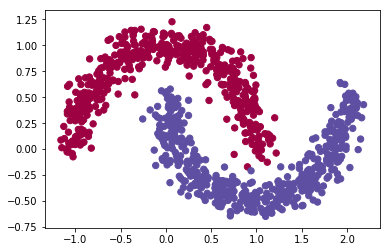

In [16]:
## Half moon 
num_samples = 1000
features, labels = sklearn.datasets.make_moons(num_samples, noise=0.10)
inputs = tf.constant(features, dtype=tf.float32)
outputs = tf.constant(labels, dtype=tf.float32)

plt.scatter(features[:,0], features[:,1], s=40, c=labels, cmap=plt.cm.Spectral)
plt.show()

In [608]:
class Model(object):
    def __init__(self, n_classes, n_features, n_hidden_units=10, learning_rate=0.01, n_batches = 1, epochs = 10, random_seed = 12):
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches       
        self.random_seed = random_seed 
        [self.W1, self.W2] = self._init_weights()
        self.B1 = self._init_bias()
        
        
    def _init_weights(self):
        W1 = tf.random.uniform(shape = (self.n_hidden_units, self.n_features), minval = -1.0, maxval = 1.0)
        W2 = tf.random.uniform(shape = (self.n_hidden_units, self.n_features), minval = -1.0, maxval = 1.0)
        return W1, W2

    
    def _init_bias(self):
        B1 =  tf.ones(shape = (self.W1.shape[0], self.W1.shape[1]))
        return B1

    def __call__(self, x, binary = False):
        self.binarize()
        if binary:
            return self.W_ * x + self.b_
        return self.W * x + self.b
    
    def params(self):
        return self.W, self.b
    
    def binarize(self):
        self.b_ = binarize(self.b)
        self.W_ = binarize(self.W)
        
    def _forward(self, X):
        output = tf.add(X * self.W1, self.B1,);
        output = tf.sigmoid(tf.reduce_sum(model._forward(inputs[0])))

def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

model = Model(n_classes = 2, n_features = 2)


In [601]:
test = tf.sigmoid(tf.reduce_sum(tf.tensordot(inputs , model.W1, axes=0), axis=2))
test[1]

<tf.Tensor: id=51827, shape=(2, 2), dtype=float32, numpy=
array([[0.48555806, 0.98276883],
       [0.50397176, 0.24753782]], dtype=float32)>

In [602]:
tf.reshape(tf.tensordot(inputs, model.W1, axes= 0), shape= (1000,10,4) )[1]

<tf.Tensor: id=51845, shape=(10, 4), dtype=float32, numpy=
array([[-0.2863747 ,  0.6733936 ,  0.60252917,  1.277832  ],
       [ 0.14372377,  1.1305226 , -0.7237868 ,  0.6435244 ],
       [-1.318809  , -0.50012887,  1.3526262 ,  0.6323549 ],
       [-0.5227321 , -0.392865  , -0.01973142,  1.2987868 ],
       [ 0.49725378,  0.4371044 ,  0.2175173 , -1.1568696 ],
       [ 0.07873762, -0.18514699, -0.1656631 , -0.35133502],
       [-0.0395163 , -0.31083286,  0.19900239, -0.17693456],
       [ 0.36260146,  0.13750851, -0.37189937, -0.17386355],
       [ 0.14372317,  0.10801672,  0.00542508, -0.35709643],
       [-0.13671802, -0.12018017, -0.05980555,  0.31807688]],
      dtype=float32)>

In [609]:
tf.sigmoid(tf.reduce_sum(model._forward(inputs[0])))

RecursionError: maximum recursion depth exceeded while calling a Python object

In [589]:
inputs[1] * model.W1

<tf.Tensor: id=51574, shape=(10, 2), dtype=float32, numpy=
array([[ 0.4172117 , -0.07035191],
       [-1.0965296 ,  0.27140078],
       [ 0.17104277,  0.08527703],
       [-0.5652323 , -0.05128738],
       [-0.8683486 ,  0.24124287],
       [-0.03267822,  0.16983794],
       [-0.3051213 ,  0.15160102],
       [ 0.18570918, -0.08802895],
       [-1.2738297 ,  0.21753457],
       [-1.1862693 ,  0.12391813]], dtype=float32)>

In [ ]:
class NNClassifier:

    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.01,
                 n_batches=1, random_seed=None):

        if random_seed:
            np.random.seed(random_seed)
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches

    def _init_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_hidden_units * (self.n_features + 1))
        w1 = w1.reshape(self.n_hidden_units, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_classes * (self.n_hidden_units + 1))
        w2 = w2.reshape(self.n_classes, self.n_hidden_units + 1)
        return w1, w2

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        return X_new

    def _forward(self, X):
        net_input = self._add_bias_unit(X, how='column')
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        act_hidden = self._add_bias_unit(act_hidden, how='row')
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out
    
    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
        sigma3 = act_out - y
        net_hidden = self._add_bias_unit(net_hidden, how='row')
        sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(net_input)
        grad2 = sigma3.dot(act_hidden.T)
        return grad1, grad2

    def _error(self, y, output):
        L1_term = L1_reg(self.l1, self.w1, self.w2)
        L2_term = L2_reg(self.l2, self.w1, self.w2)
        error = cross_entropy(output, y) + L1_term + L2_term
        return 0.5 * np.mean(error)

    def _backprop_step(self, X, y):
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
        y = y.T

        grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)

        # regularize
        grad1[:, 1:] += (self.w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (self.w2[:, 1:] * (self.l1 + self.l2))

        error = self._error(y, act_out)
        
        return error, grad1, grad2

    def predict(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return mle(net_out.T)
    
    def predict_proba(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return softmax(act_out.T)

    def fit(self, X, y):
        self.error_ = []
        X_data, y_data = X.copy(), y.copy()
        y_data_enc = one_hot(y_data, self.n_classes)
        for i in range(self.epochs):

            X_mb = np.array_split(X_data, self.n_batches)
            y_mb = np.array_split(y_data_enc, self.n_batches)
            
            epoch_errors = []

            for Xi, yi in zip(X_mb, y_mb):
                
                # update weights
                error, grad1, grad2 = self._backprop_step(Xi, yi)
                epoch_errors.append(error)
                self.w1 -= (self.learning_rate * grad1)
                self.w2 -= (self.learning_rate * grad2)
            self.error_.append(np.mean(epoch_errors))
        return self
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.sum(y == y_hat, axis=0) / float(X.shape[0])